In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

---
# 데이터 로드 및 전처리
---

In [2]:
def load_data():
    # 매매기준율 데이터 로드 및 전처리 코드
    df = pd.read_csv('../sql_data/mama.csv', sep='\t', dtype=str)
    df.columns = ['createdAt,data']
    df = df['createdAt,data'].str.split(',', n=1, expand=True)
    df.columns = ['createdAt', 'data']
    
    # JSON 파싱 함수
    def parse_json(json_str, created_at=None):
        try:
            # 앞부분 따옴표 제거
            json_str = json_str.replace('"{"result":', '{"result":')
            # 뒷부분 따옴표 제거
            if json_str.endswith('}]}"'): # '}]}"'로 끝나는지 확인
                json_str = json_str[:-1]
            data = json.loads(json_str)
            result_df = pd.DataFrame(data['result'])
            # 시간 추가
            if created_at is not None:
                result_df['createdAt'] = created_at
            return result_df
        except Exception as e:
            return None

    # 전체 데이터 처리
    parsed_data = []
    for _, row in df.iterrows(): # 각 행 순회
        result = parse_json(row['data'], row['createdAt'])
        if result is not None:
            result['createdAt'] = pd.to_datetime(result['createdAt'], format='%Y-%m-%d %H:%M:%S') + pd.Timedelta(hours=9) # UTC -> KST
            parsed_data.append(result)
    
    final_df = pd.concat(parsed_data, ignore_index=True)
    
    return final_df

In [ ]:
df = load_data()
df.describe()

In [4]:
usd = df[df['currencyCode'] == 'USD']
usd = usd[['currencyCode', 'basePrice', 'createdAt']]
usd

,currencyCode,basePrice,createdAt
0,USD,1473.0,2025-01-03 02:00:57
42,USD,1473.0,2025-01-03 02:05:09
84,USD,1473.0,2025-01-03 02:10:09
126,USD,1473.0,2025-01-03 02:15:09
168,USD,1473.0,2025-01-03 02:20:10
...,...,...,...
741174,USD,1457.5,2025-02-01 08:50:10
741216,USD,1457.5,2025-02-01 08:52:09
741258,USD,1457.5,2025-02-01 08:54:09
741300,USD,1457.5,2025-02-01 08:56:09


In [5]:
jpy = df[df['currencyCode'] == 'JPY']
jpy = jpy[['currencyCode', 'basePrice', 'createdAt']]
jpy

,currencyCode,basePrice,createdAt
1,JPY,934.38,2025-01-03 02:00:57
43,JPY,934.38,2025-01-03 02:05:09
85,JPY,934.38,2025-01-03 02:10:09
127,JPY,934.38,2025-01-03 02:15:09
169,JPY,934.38,2025-01-03 02:20:10
...,...,...,...
741175,JPY,939.35,2025-02-01 08:50:10
741217,JPY,939.35,2025-02-01 08:52:09
741259,JPY,939.35,2025-02-01 08:54:09
741301,JPY,939.35,2025-02-01 08:56:09


---
# 시계열 시각화
---

In [6]:
# function
def plot_time_series(df, currency_code):
    plt.figure(figsize=(12, 6))
    plt.plot(df['createdAt'], df['basePrice'], label=currency_code)
    plt.title(f'{currency_code} Time series')
    plt.xlabel('Date')
    plt.ylabel('Base Price')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

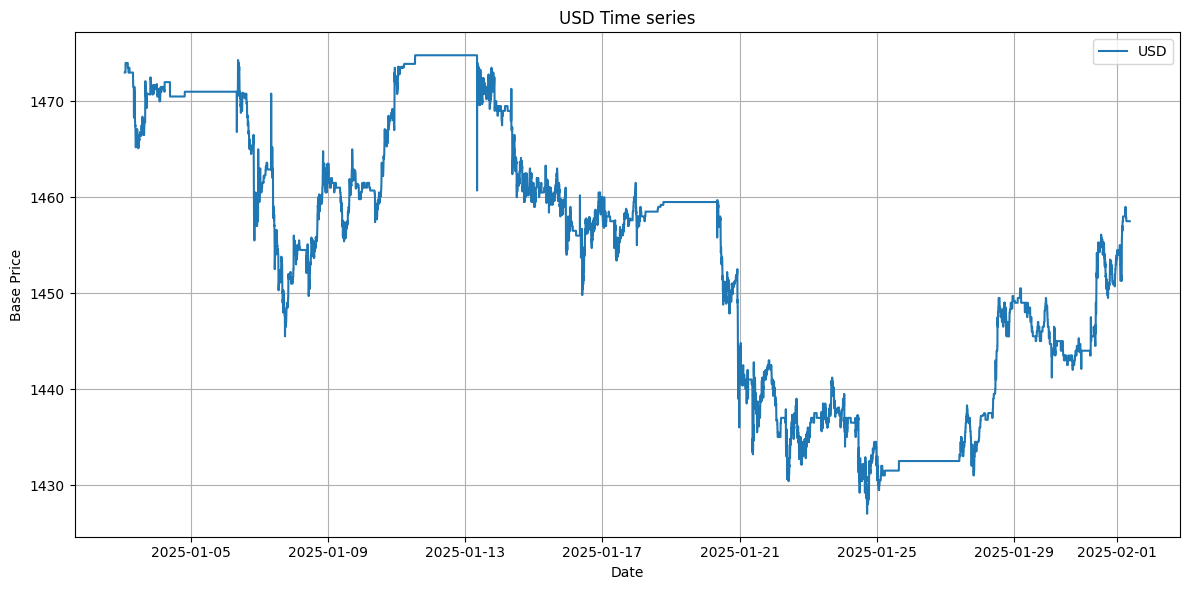

In [7]:
# USD
plot_time_series(usd, 'USD')

In [8]:
# function
def plot_time_series_sns(df, currency_code):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='createdAt', y='basePrice', data=df, label=currency_code)
    plt.title(f'{currency_code} Time series')
    plt.xlabel('Date')
    plt.ylabel('Base Price')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

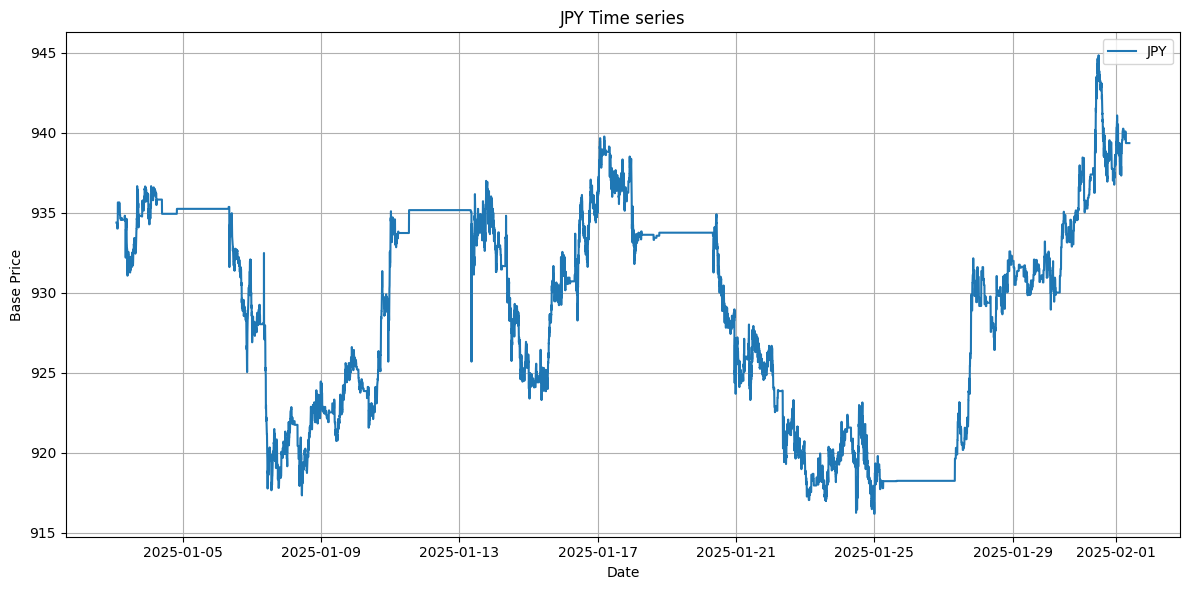

In [9]:
# jpy
plot_time_series_sns(jpy, 'JPY')

In [10]:
# function
def plot_time_series_px(df, currency_code):
    fig = px.line(df, x='createdAt', y='basePrice', title=f'{currency_code} Time series')  # Plotly를 사용한 시각화
    fig.update_layout(xaxis_title='Date', yaxis_title='Base Price')  # 축 제목 설정
    fig.show()

In [ ]:
plot_time_series_px(usd, 'USD')

In [12]:
plot_time_series_px(jpy, 'JPY')

In [ ]:
usd.set_index("createdAt", inplace=True)
fillter_usd = usd[(usd.index.hour >=9) | (usd.index.hour < 2)]
fillter_usd.head(50)

KeyError: "None of ['createdAt'] are in the columns"